#### Module Importation

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%reload_ext autoreload
%autoreload 
from HelperFunctions import missingValuesInfo, minibatch

import pandas_profiling
import missingno as msno 

#### Import Dataframe

In [2]:
df=pd.read_csv('lean_df_4.csv',index_col='id')

/home/auscheng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/auscheng/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### DataFrame too big to look at missingness completely. Random Sample from the entire dataframe and see the general trend. 

In [3]:
df_0=df.sample(frac=0.01,random_state=0,axis=0)
df_1=df.sample(frac=0.01,random_state=1,axis=0)
df_2=df.sample(frac=0.01,random_state=2,axis=0)
df_3=df.sample(frac=0.01,random_state=3,axis=0)

In [4]:
missingValuesInfo(df_0)

Total  Percent
verification_status_joint       21396    94.64
annual_inc_joint                21357    94.47
dti_joint                       21357    94.47
mths_since_last_derog_record    18987    83.99
mths_since_last_major_derog     16738    74.04
mths_since_last_delinq          11472    50.75
install_util                    10608    46.92
active_install_frac              9029    39.94
all_util                         8588    37.99
inq_last_12m                     8586    37.98
emp_length                       1441     6.37
active_card_frac                  732     3.24
pct_acc_nvr_dlq                   664     2.94
Outstanding_mortgage_debt         663     2.93
mths_since_RecentAcc_opened       663     2.93
open_revol_frac                   663     2.93
active_revol_frac                 663     2.93
card_frac                         663     2.93
collection_amt                    663     2.93
install_frac                      663     2.93
rev_credit                        663     2.93
install_credit                    663     2.93
revol_frac                        663     2.93
all_accs_120days+_PastDue_ever    663     2.93
accs_90days+_PastDue_24m          663     2.93
accs_opened_past_12m              663     2.93
total_credit                      663     2.93
good_acc_frac                     545     2.41
mort_frac                         476     2.11
loan_duration                      26     0.12
dti                                19     0.08
revol_util                         17     0.08
pub_rec_bankruptcies               16     0.07
delinq_2yrs                         2     0.01
earliest_cr_line                    2     0.01
total_acc                           2     0.01
derog_records                       2     0.01
acc_now_delinq                      2     0.01
collections_12_mths_ex_med          2     0.01
chargeoff_within_12_mths            2     0.01
delinq_amnt                         2     0.01
tax_liens                           2     0.01

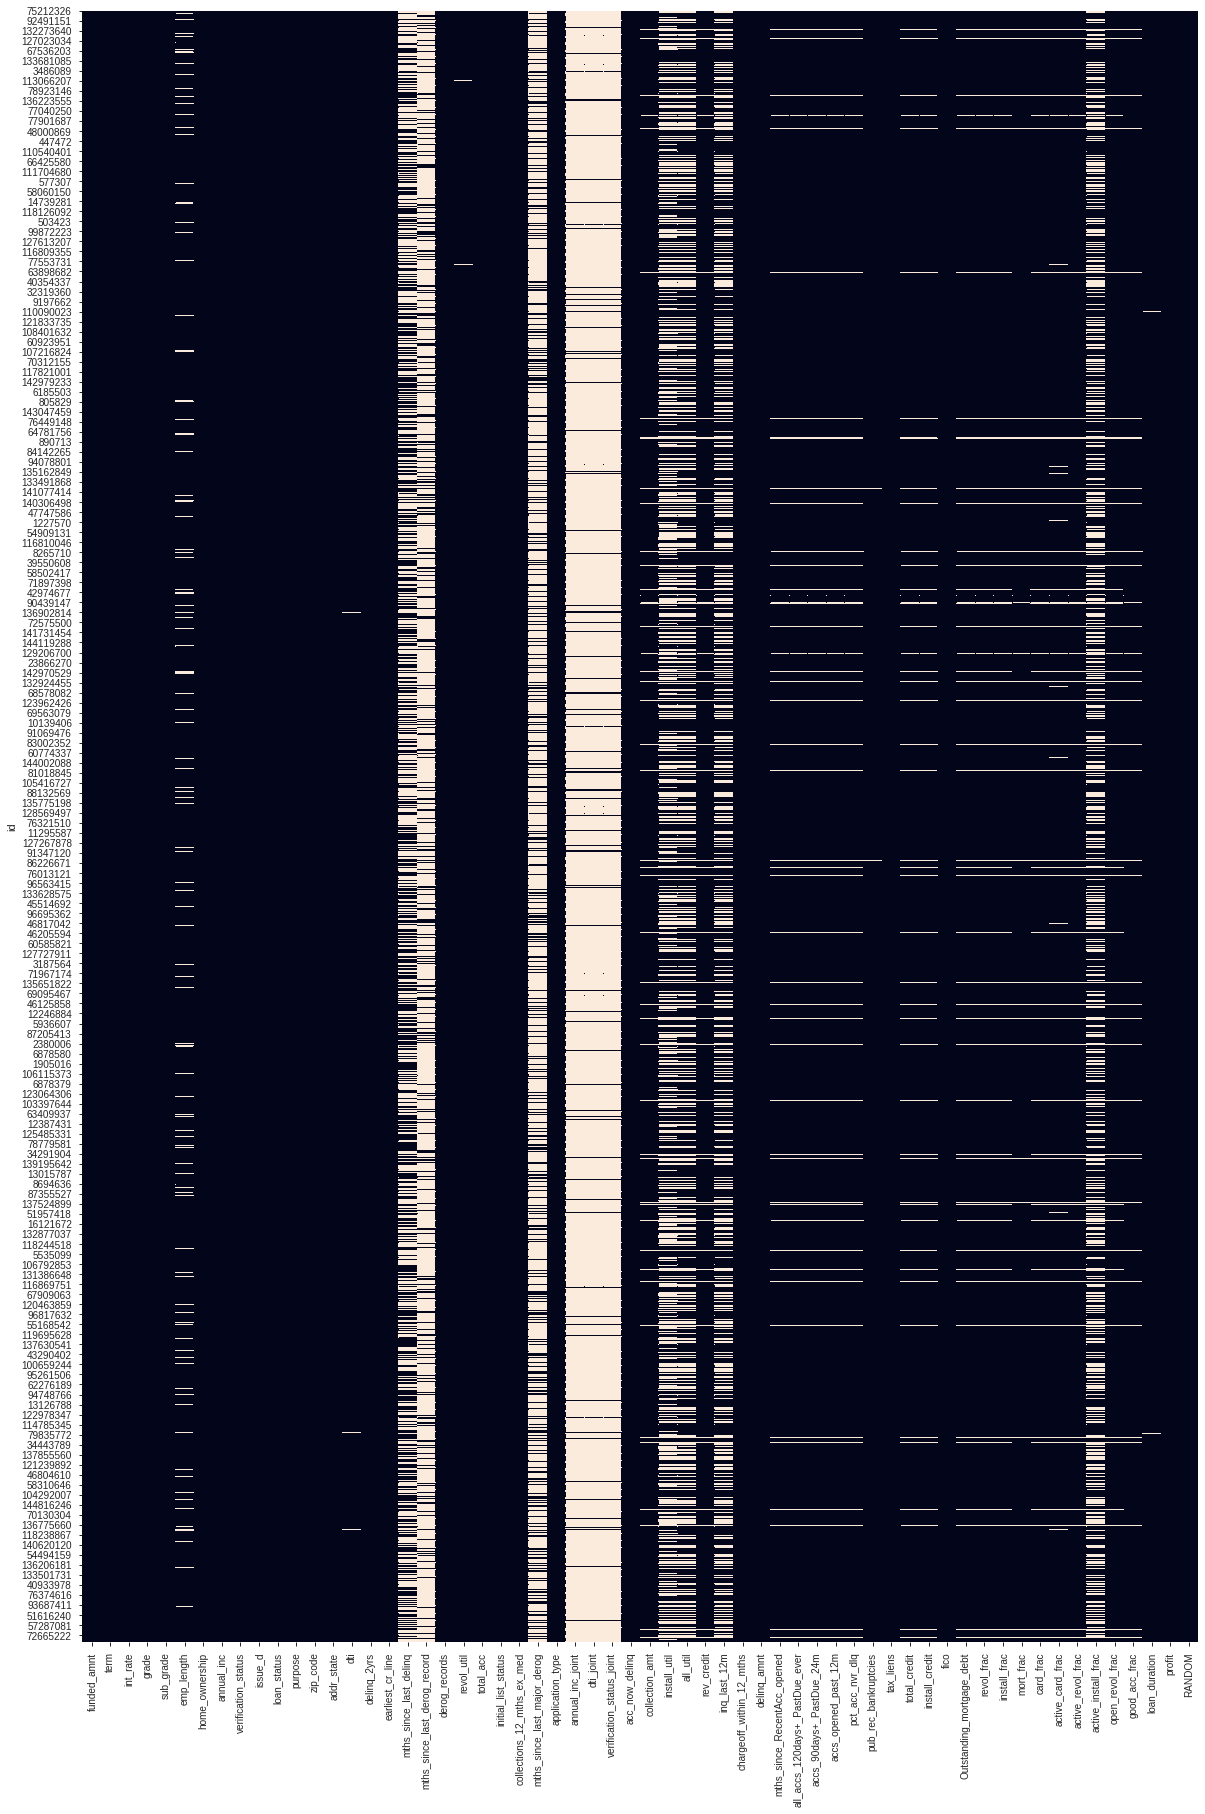

In [5]:
plt.figure(figsize=(20,30))
sns.heatmap(df_0.isnull(), cbar=False)

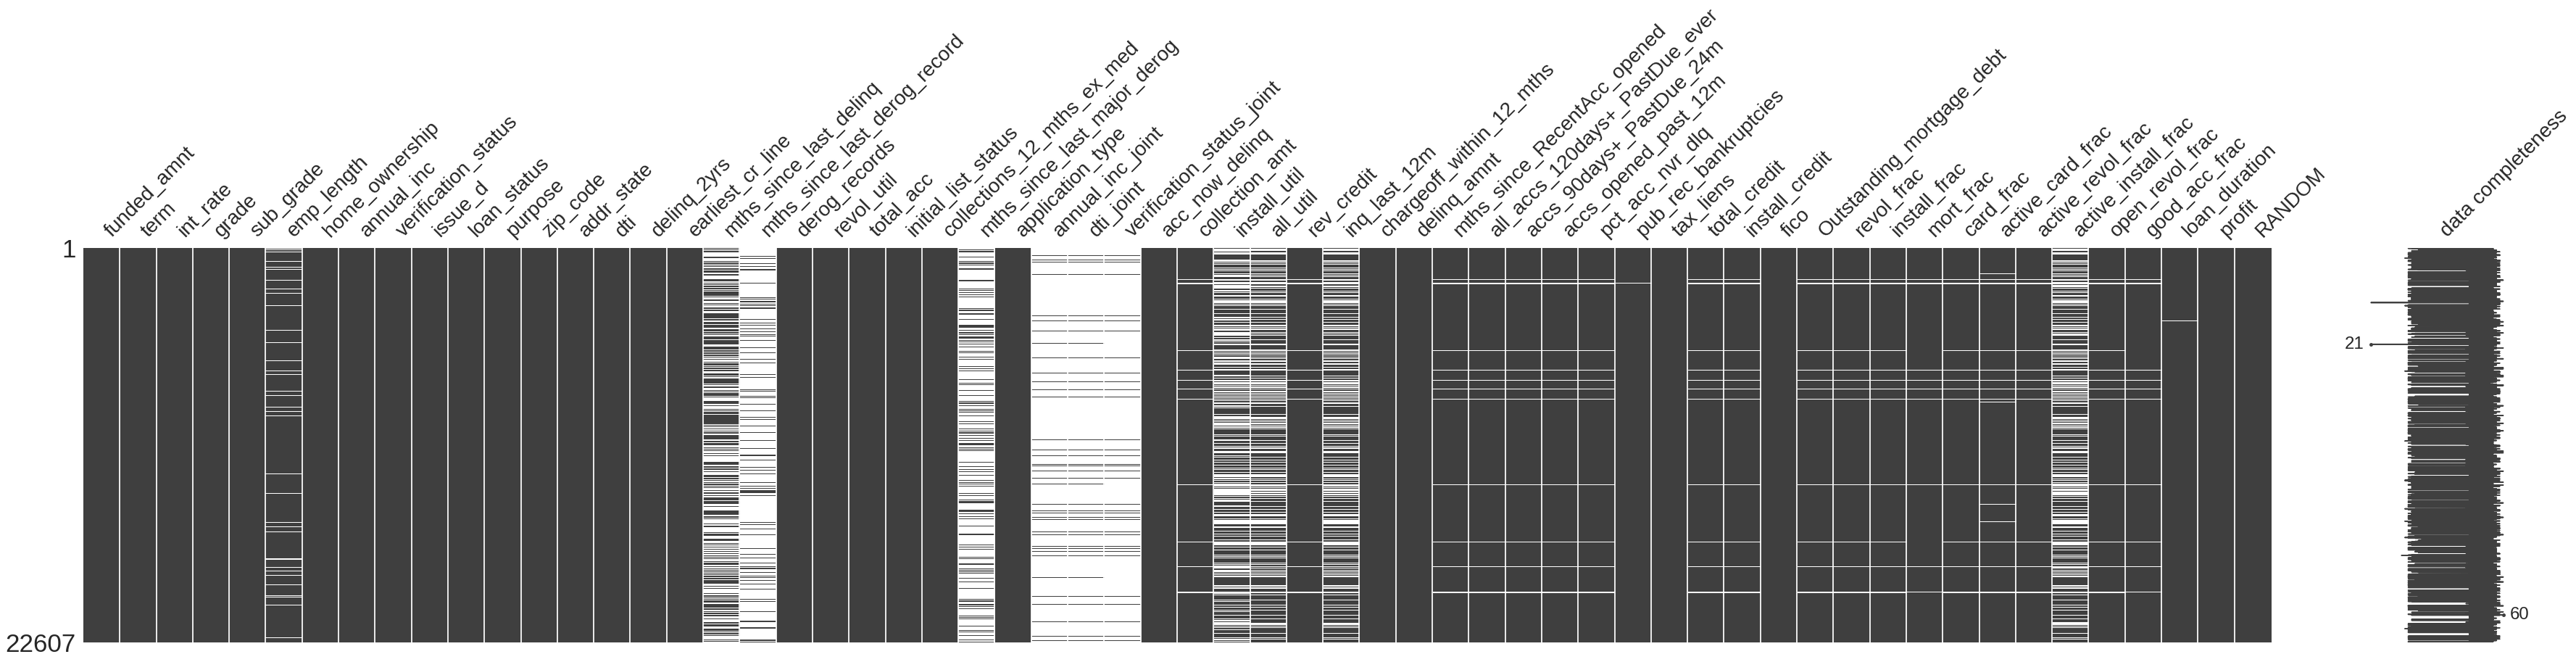

In [6]:
msno.matrix(df_0,figsize=(60, 10),fontsize=28,labels=True)

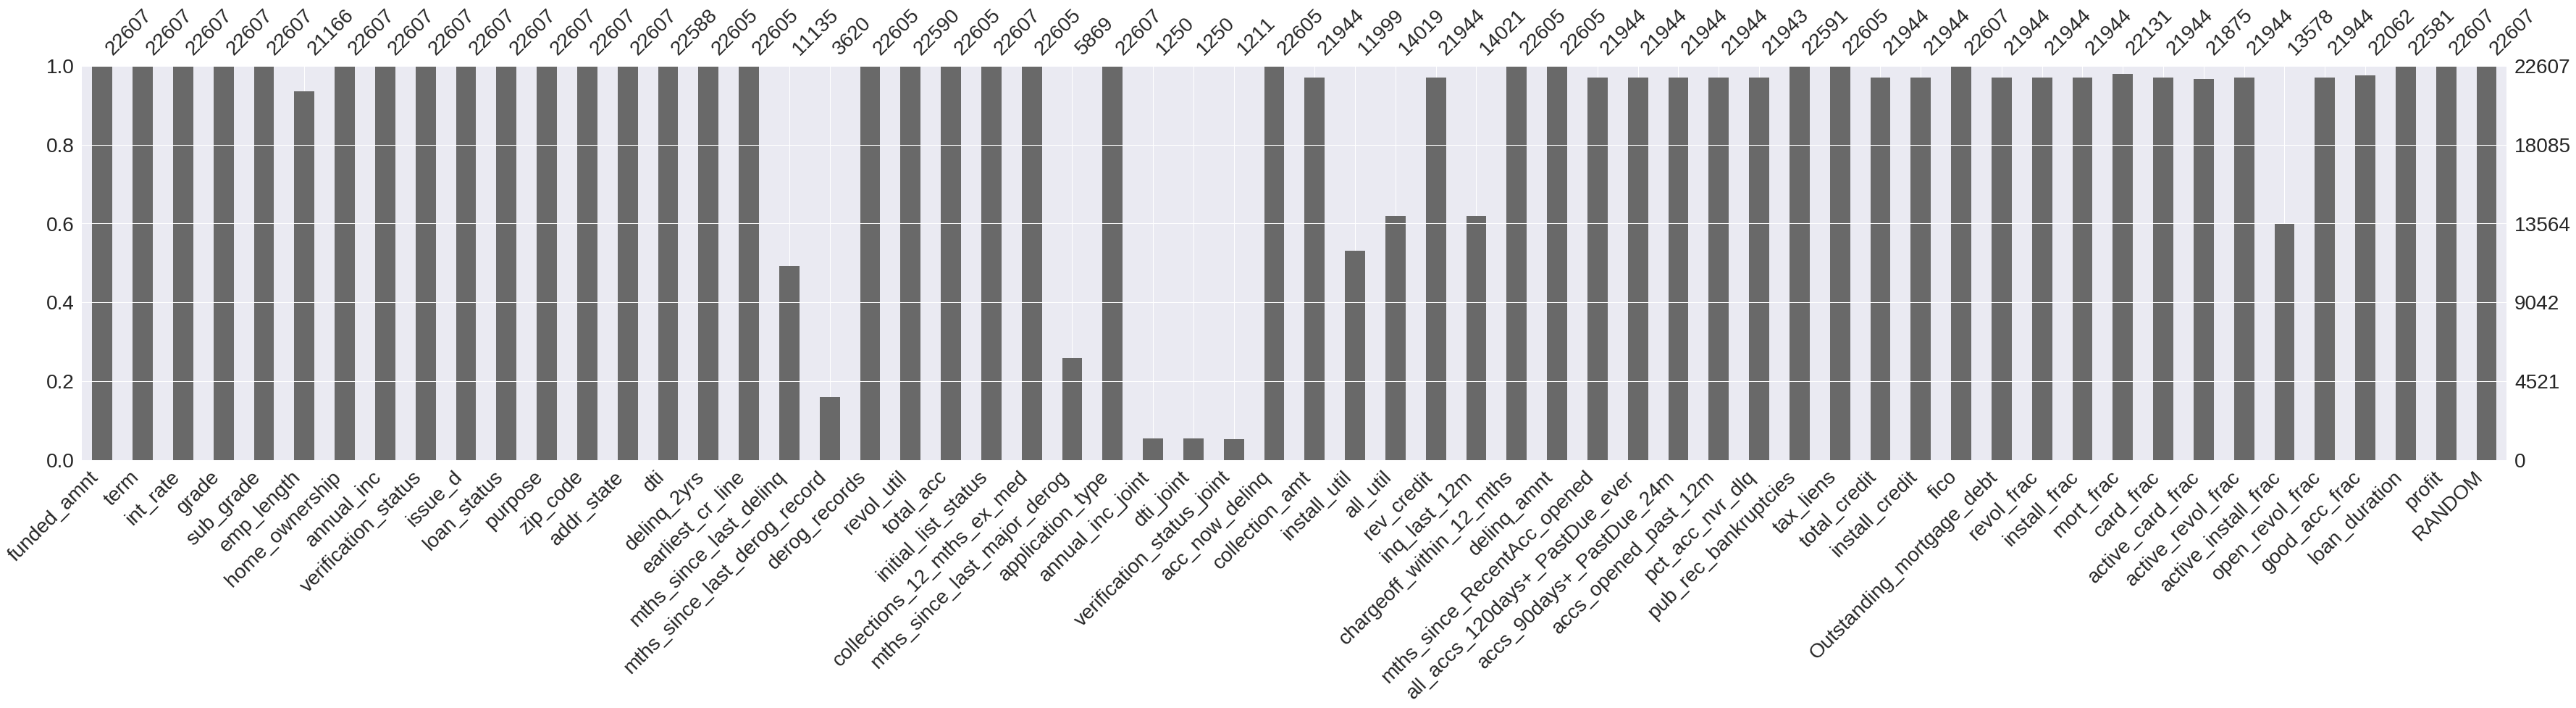

In [7]:
msno.bar(df_0,figsize=(60, 10),fontsize=28,labels=True)

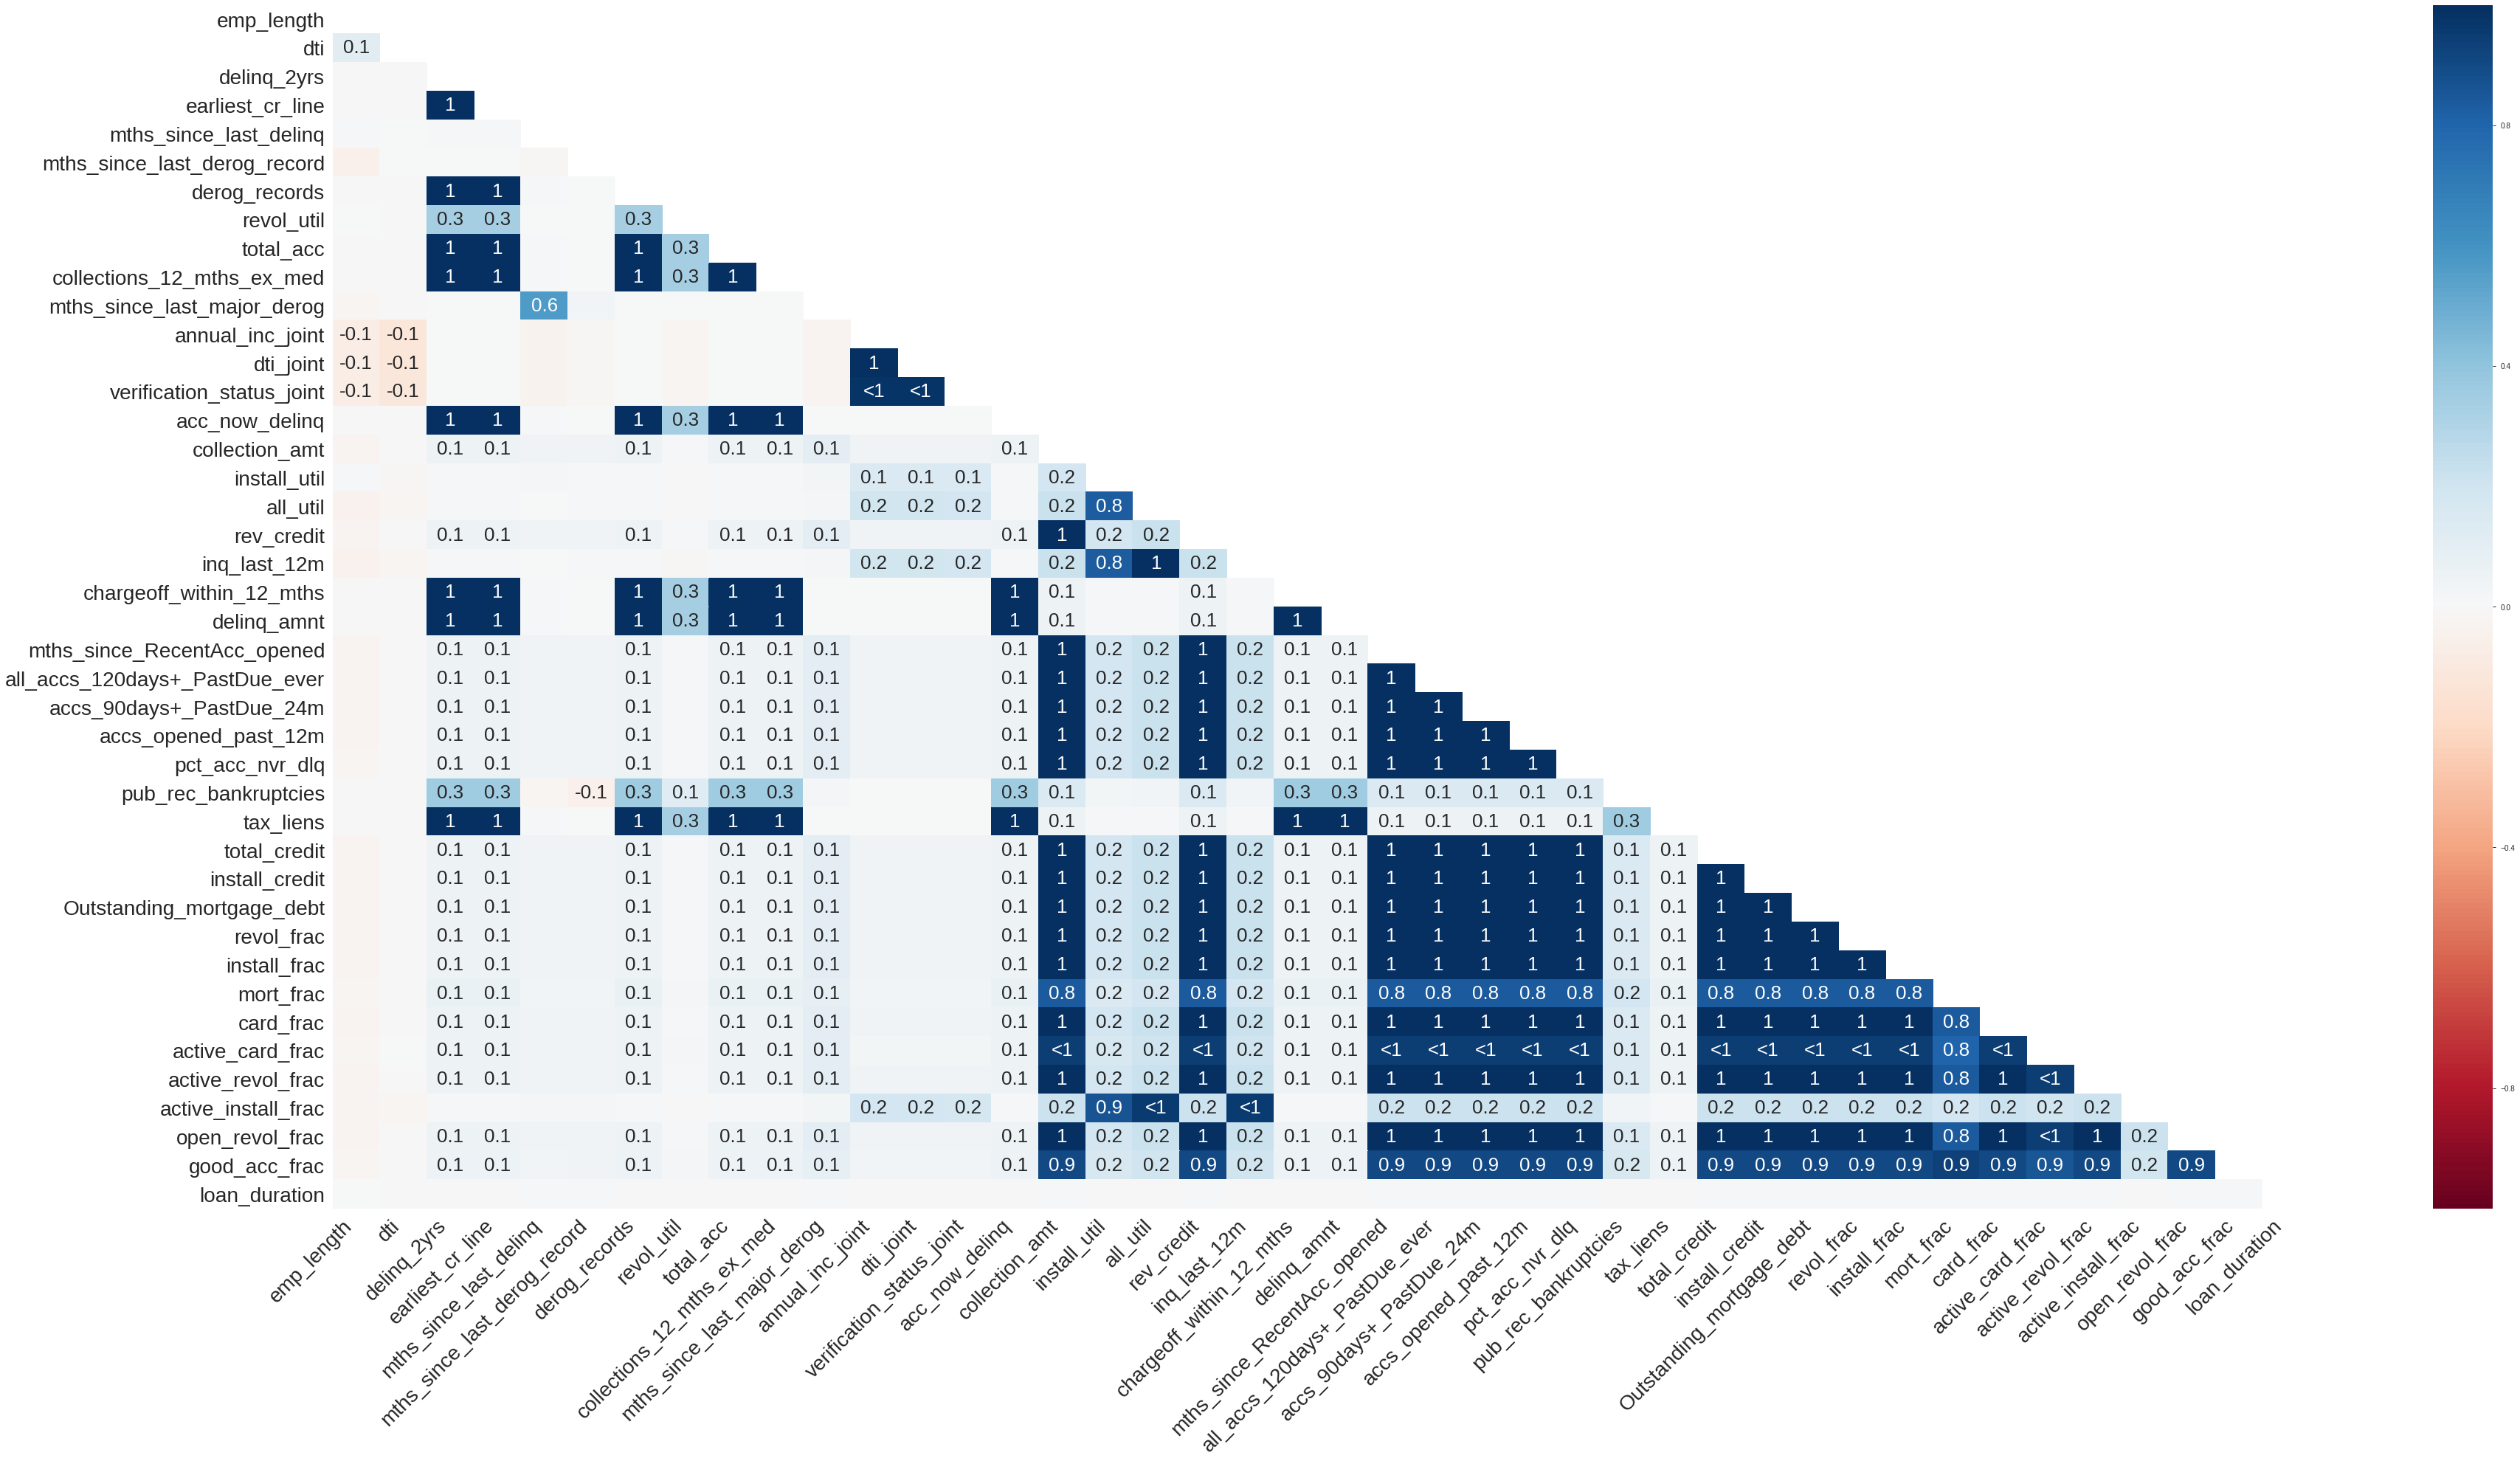

In [8]:
msno.heatmap(df_0,figsize=(60, 30),fontsize=28,labels=True)
# A value near -1 means if one variable appears then the other variable is very likely to be missing.
# A value near 0 means there is no dependence between the occurrence of missing values of two variables.
# A value near 1 means if one variable appears then the other variable is very likely to be present.

#### Looking at data in years

In [9]:
df.issue_d=pd.to_datetime(df.issue_d)
time_df=df.set_index('issue_d')
resampled_time_df=time_df.resample('M').count()

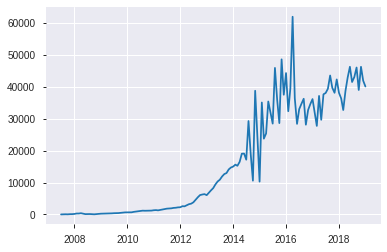

In [10]:
plt.plot(resampled_time_df.index,resampled_time_df.funded_amnt)

In [11]:
mybatch=minibatch(df)
df_2007=mybatch.takeout('2007','2008')
df_2008=mybatch.takeout('2008','2009')
df_2009=mybatch.takeout('2009','2010')
df_2010=mybatch.takeout('2010','2011')
df_2011=mybatch.takeout('2011','2012')
df_2012=mybatch.takeout('2012','2013')
df_2013=mybatch.takeout('2013','2014')
df_2014=mybatch.takeout('2014','2015')
df_2015=mybatch.takeout('2015','2016')
df_2016=mybatch.takeout('2016','2017')
df_2017=mybatch.takeout('2017','2018')
df_2018=mybatch.takeout('2018','2019')

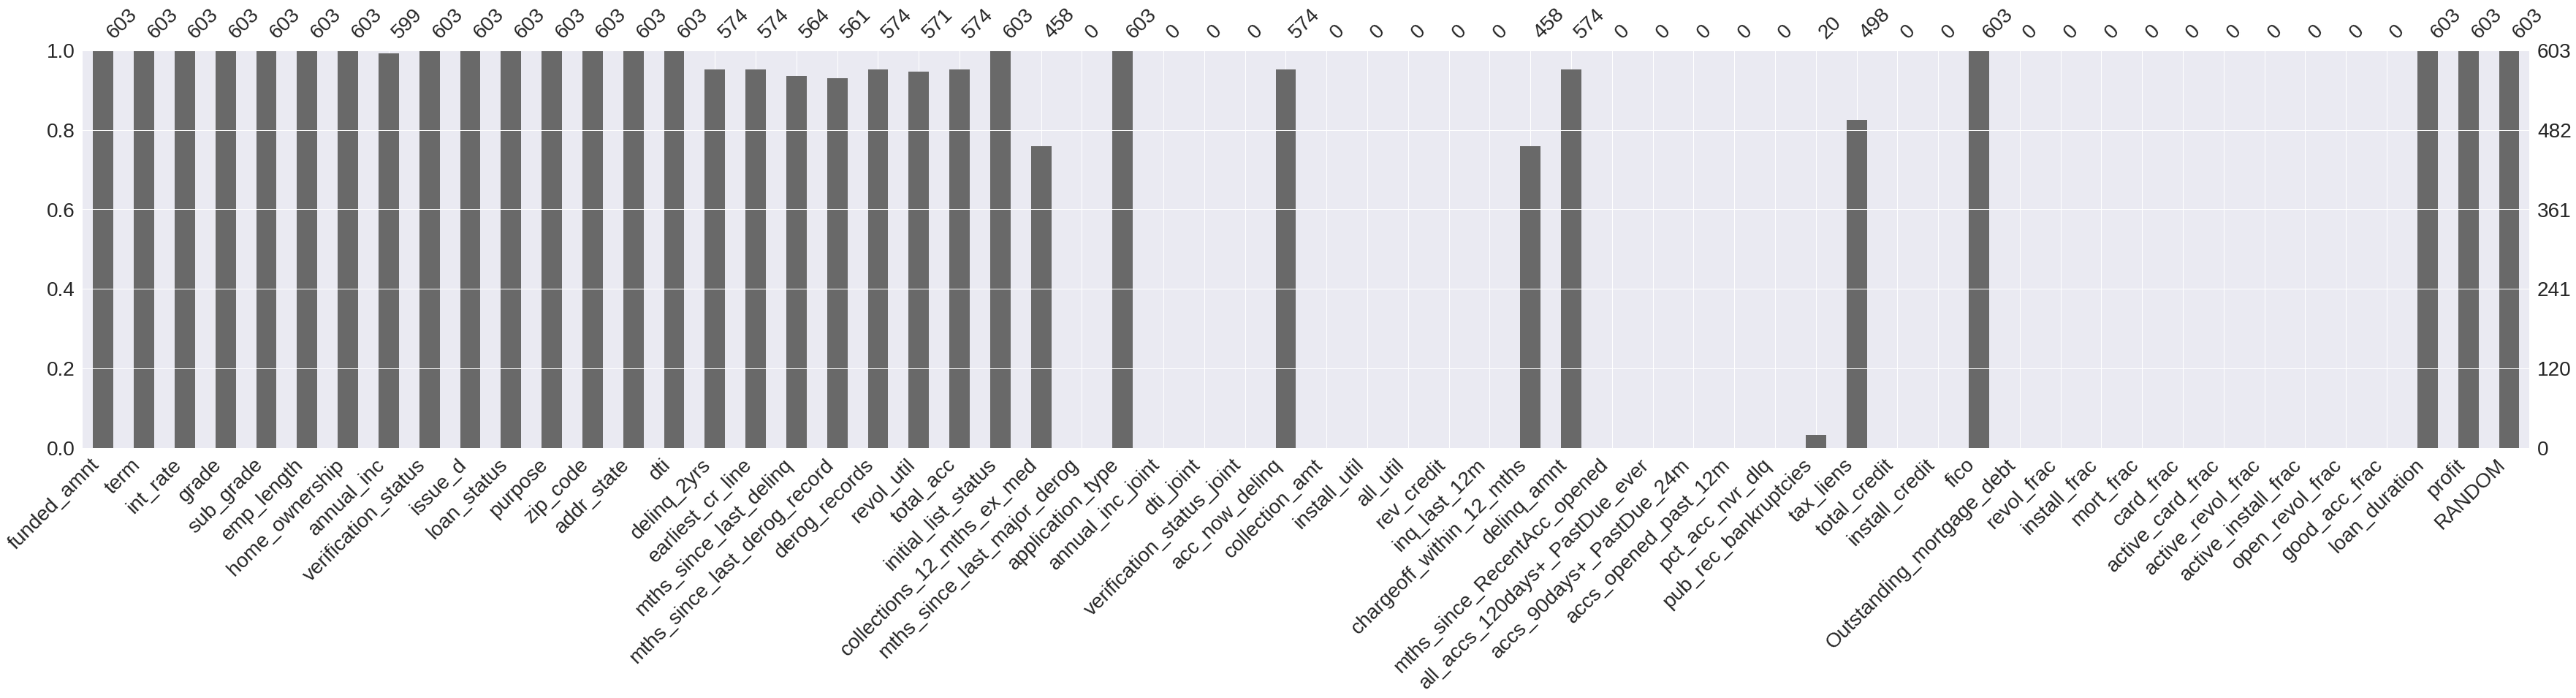

In [12]:
msno.bar(df_2007,figsize=(60, 10),fontsize=28,labels=True)

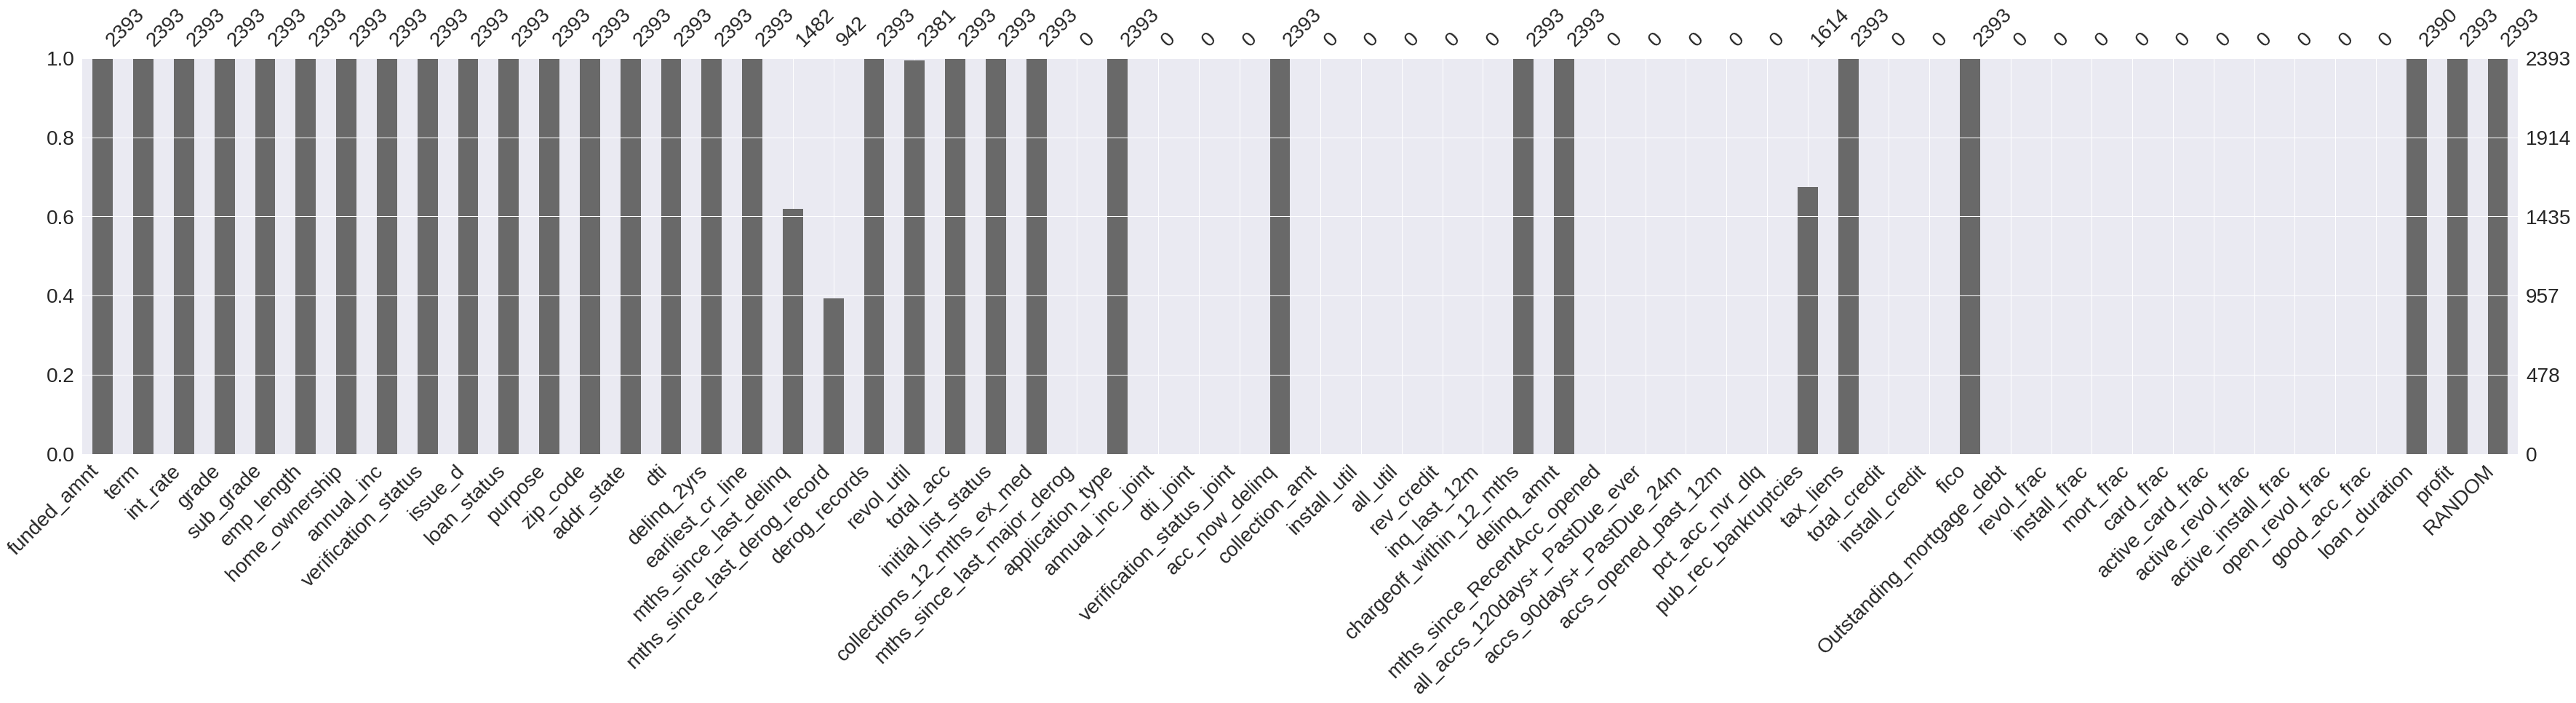

In [13]:
msno.bar(df_2008,figsize=(60, 10),fontsize=28,labels=True)

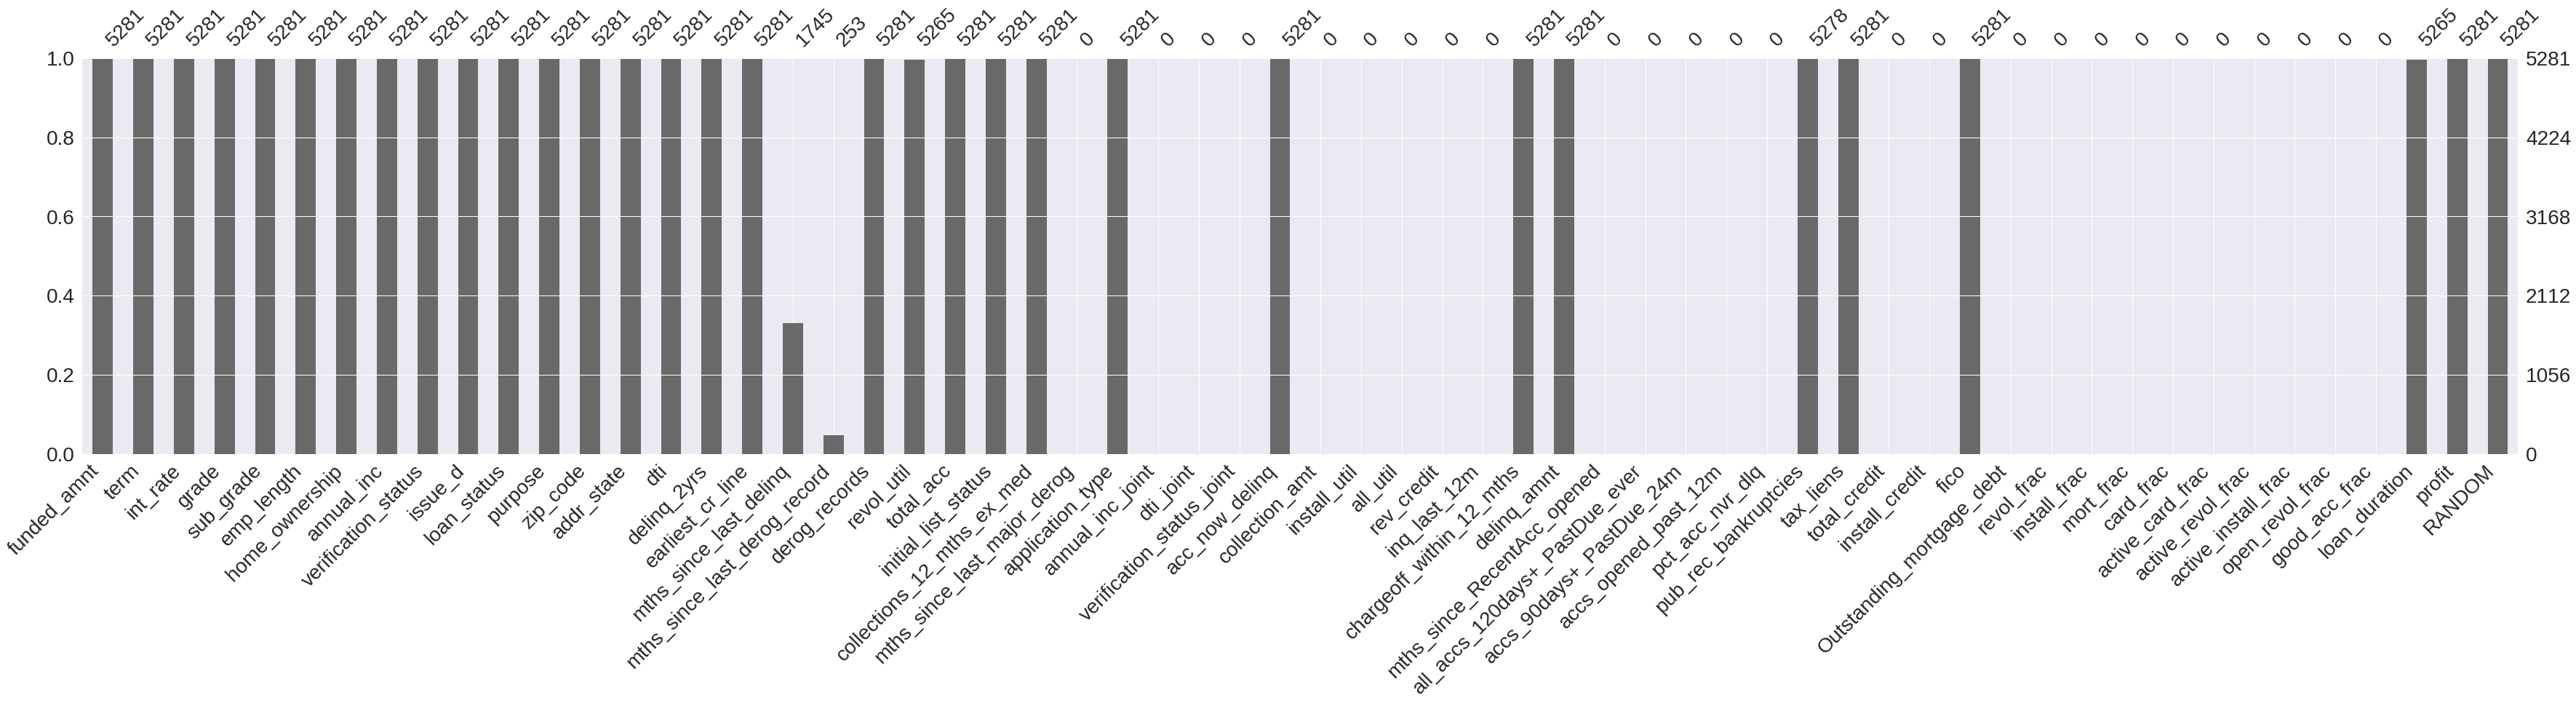

In [14]:
msno.bar(df_2009,figsize=(60, 10),fontsize=28,labels=True)

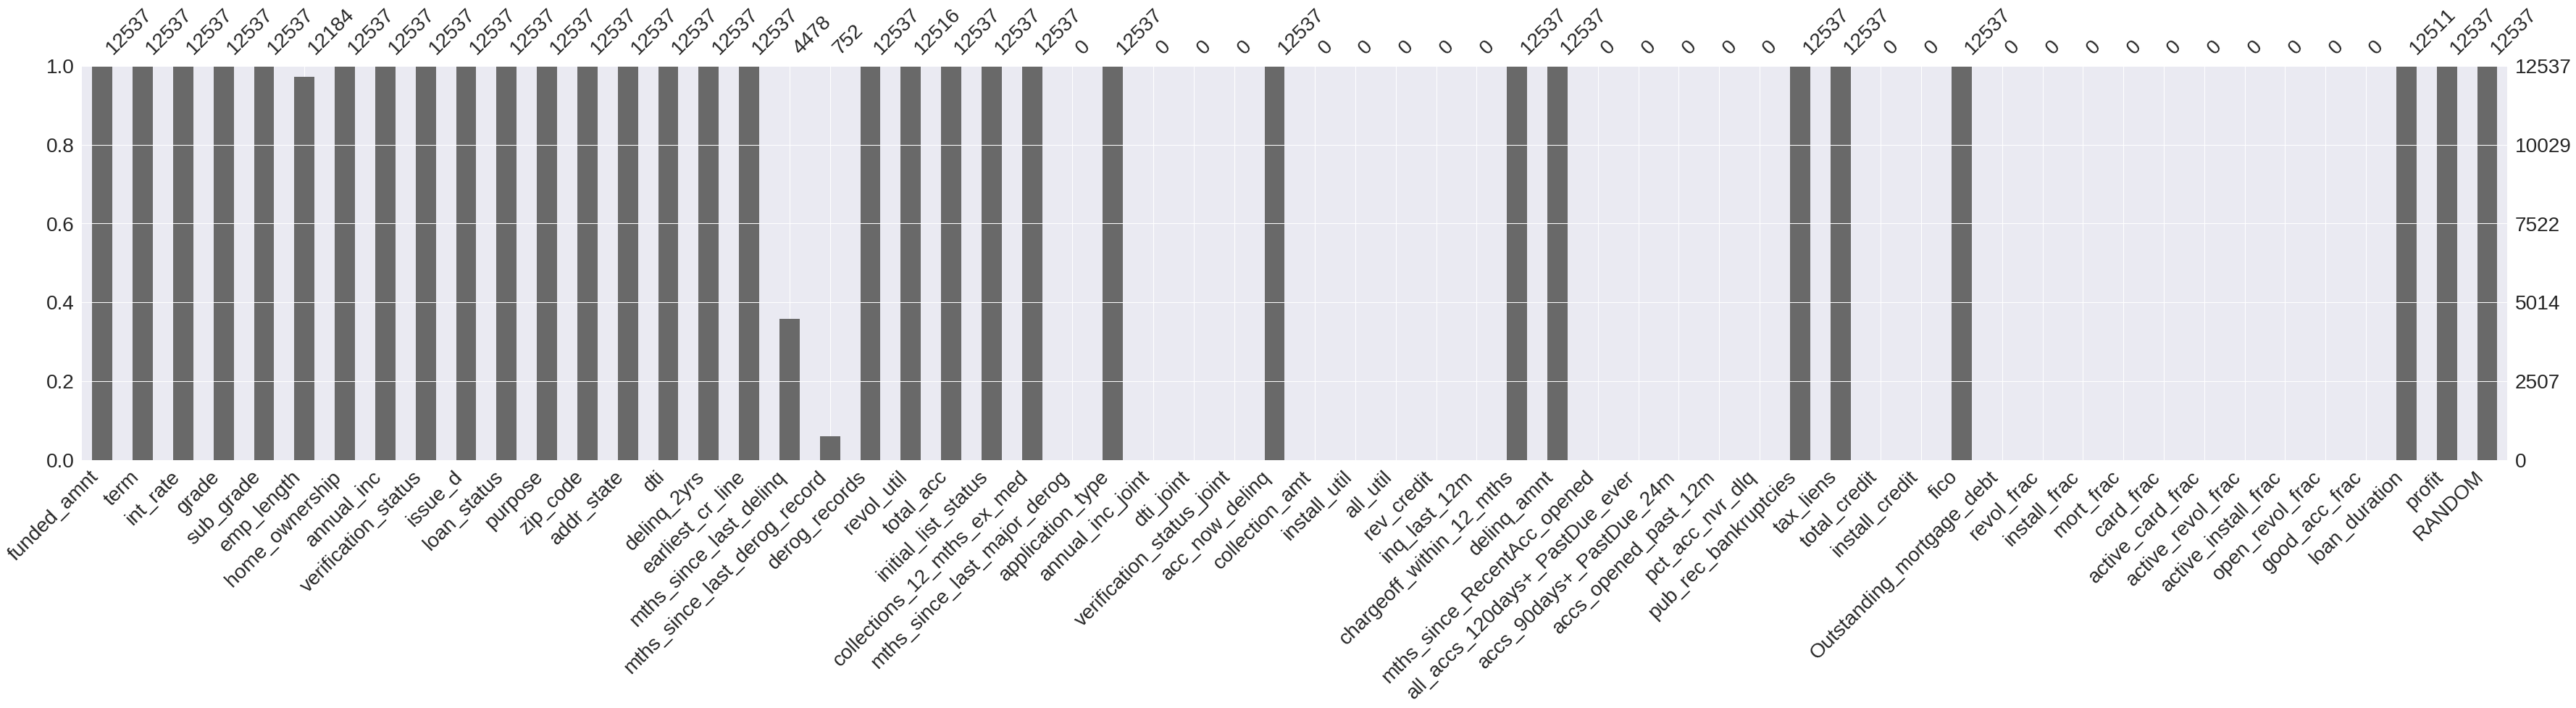

In [15]:
msno.bar(df_2010,figsize=(60, 10),fontsize=28,labels=True)

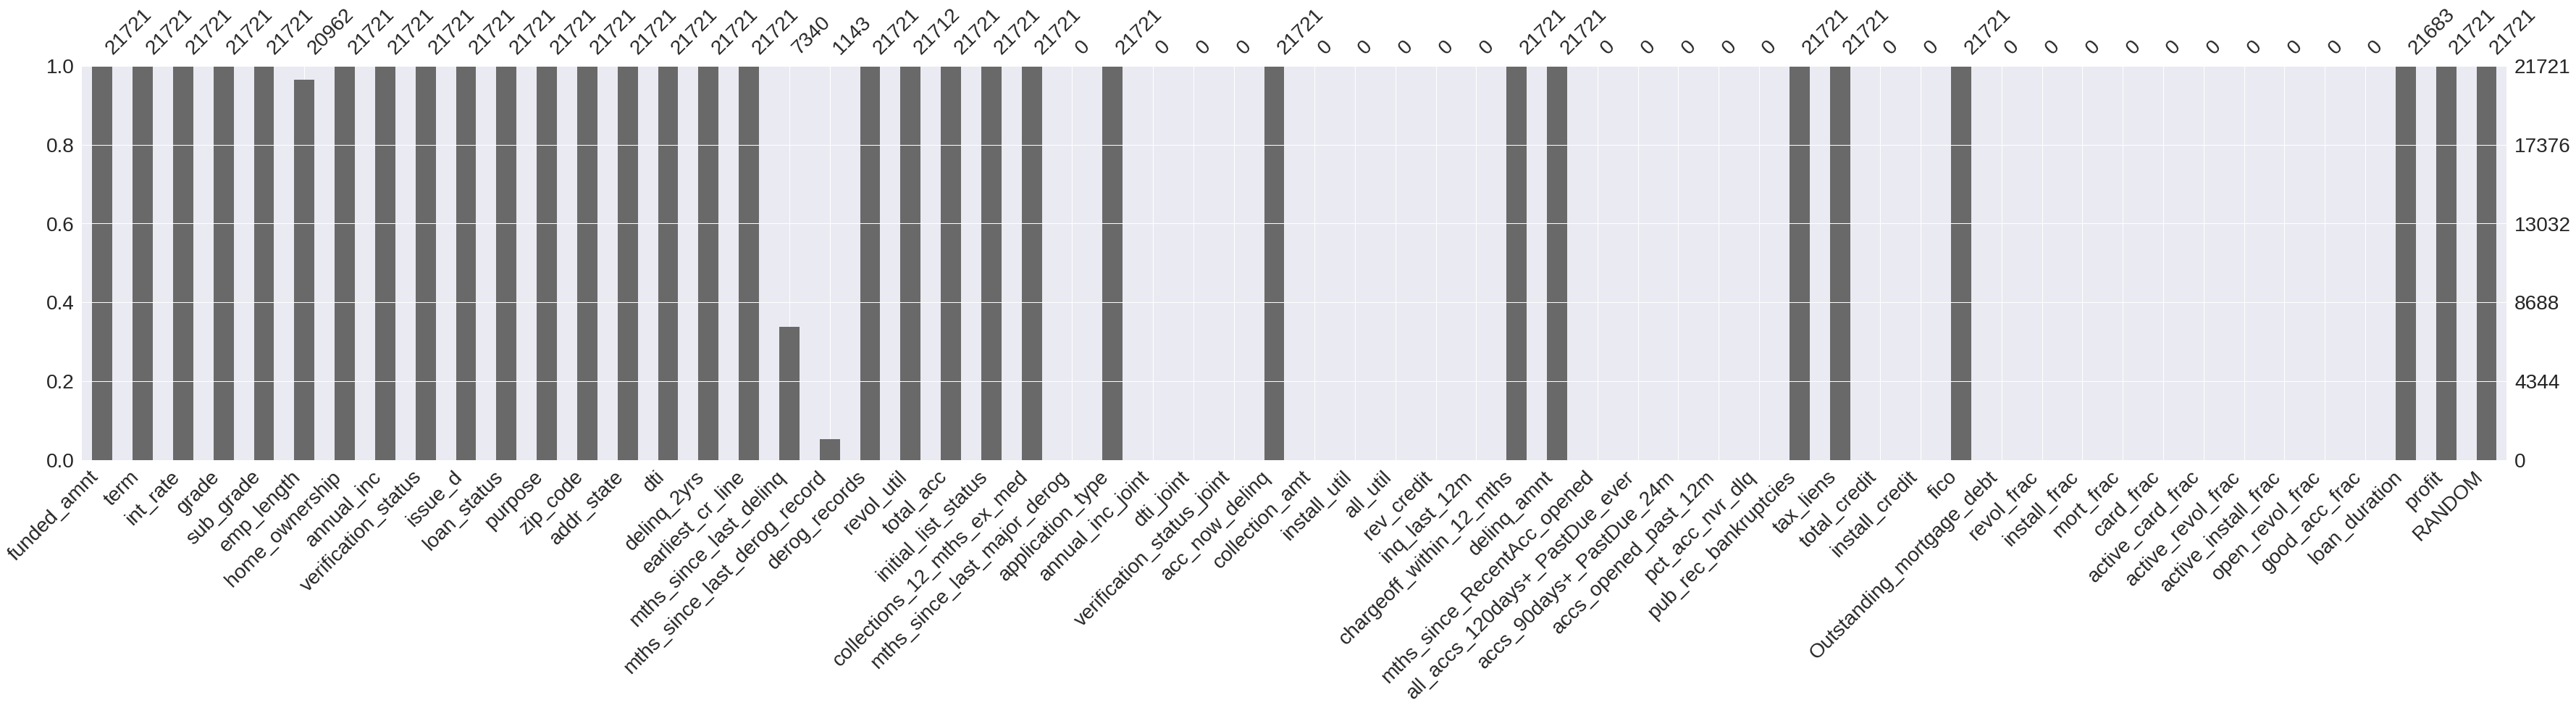

In [16]:
msno.bar(df_2011,figsize=(60, 10),fontsize=28,labels=True)

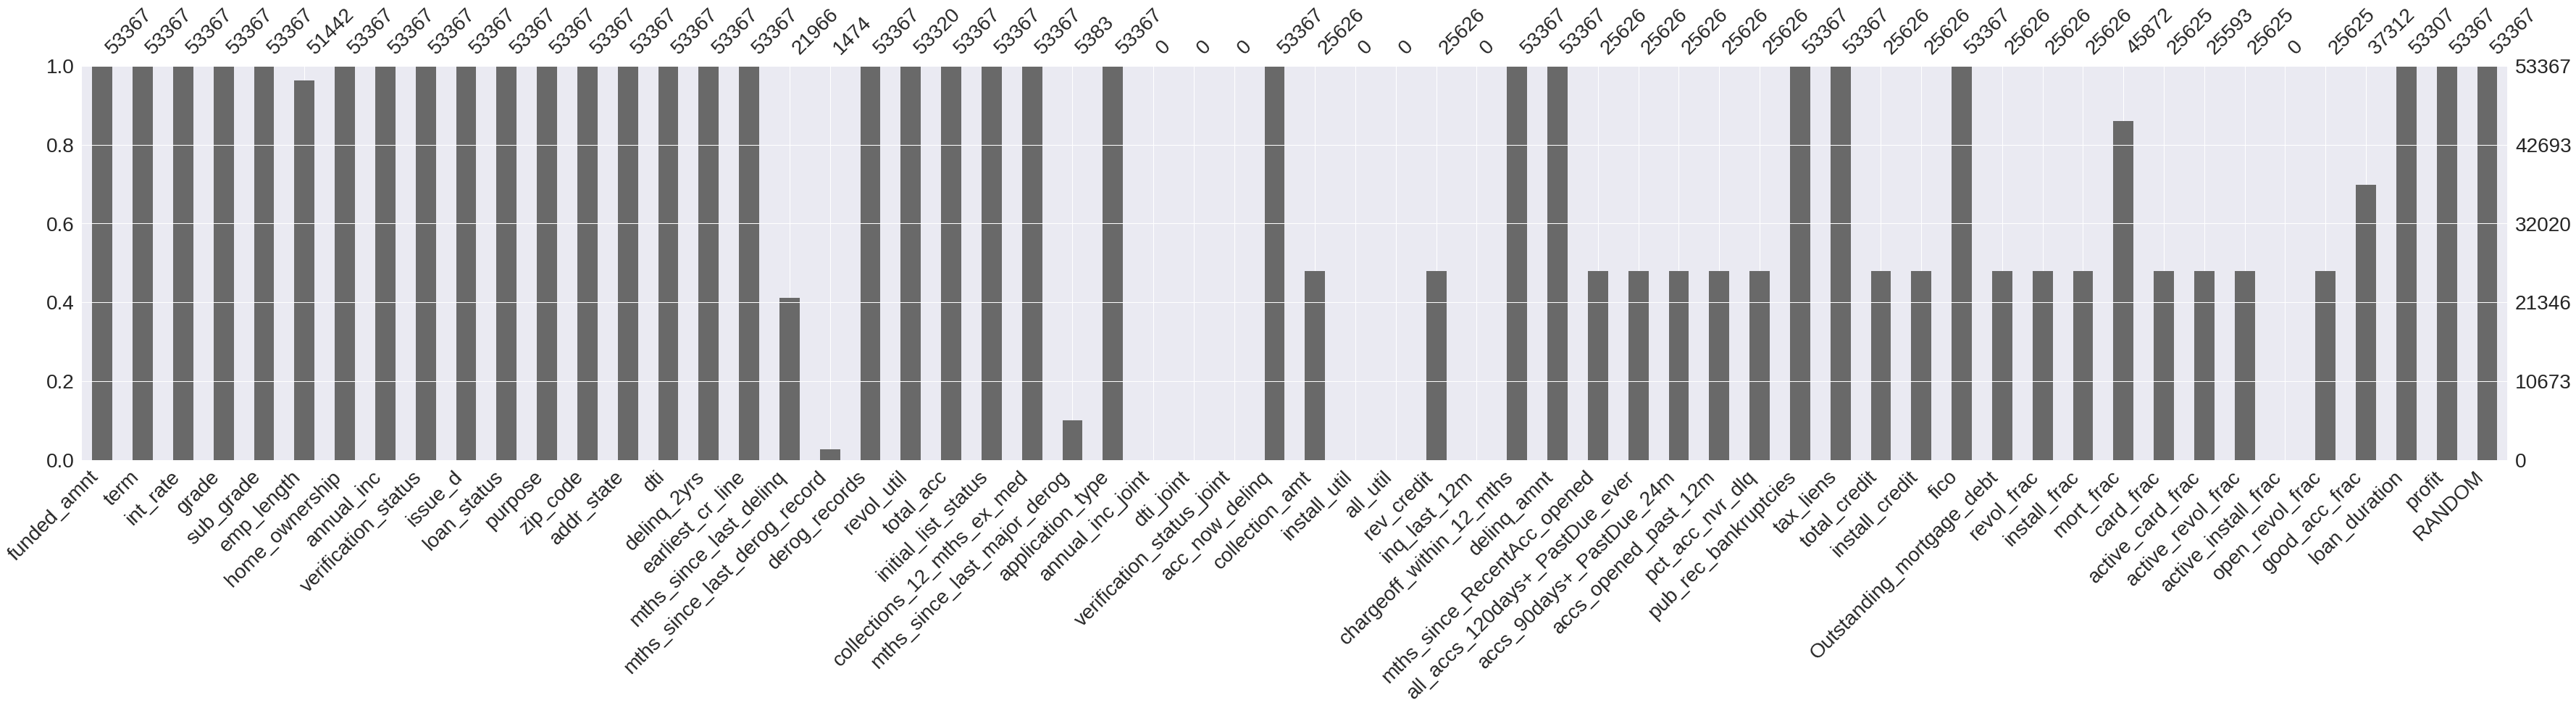

In [17]:
msno.bar(df_2012,figsize=(60, 10),fontsize=28,labels=True)

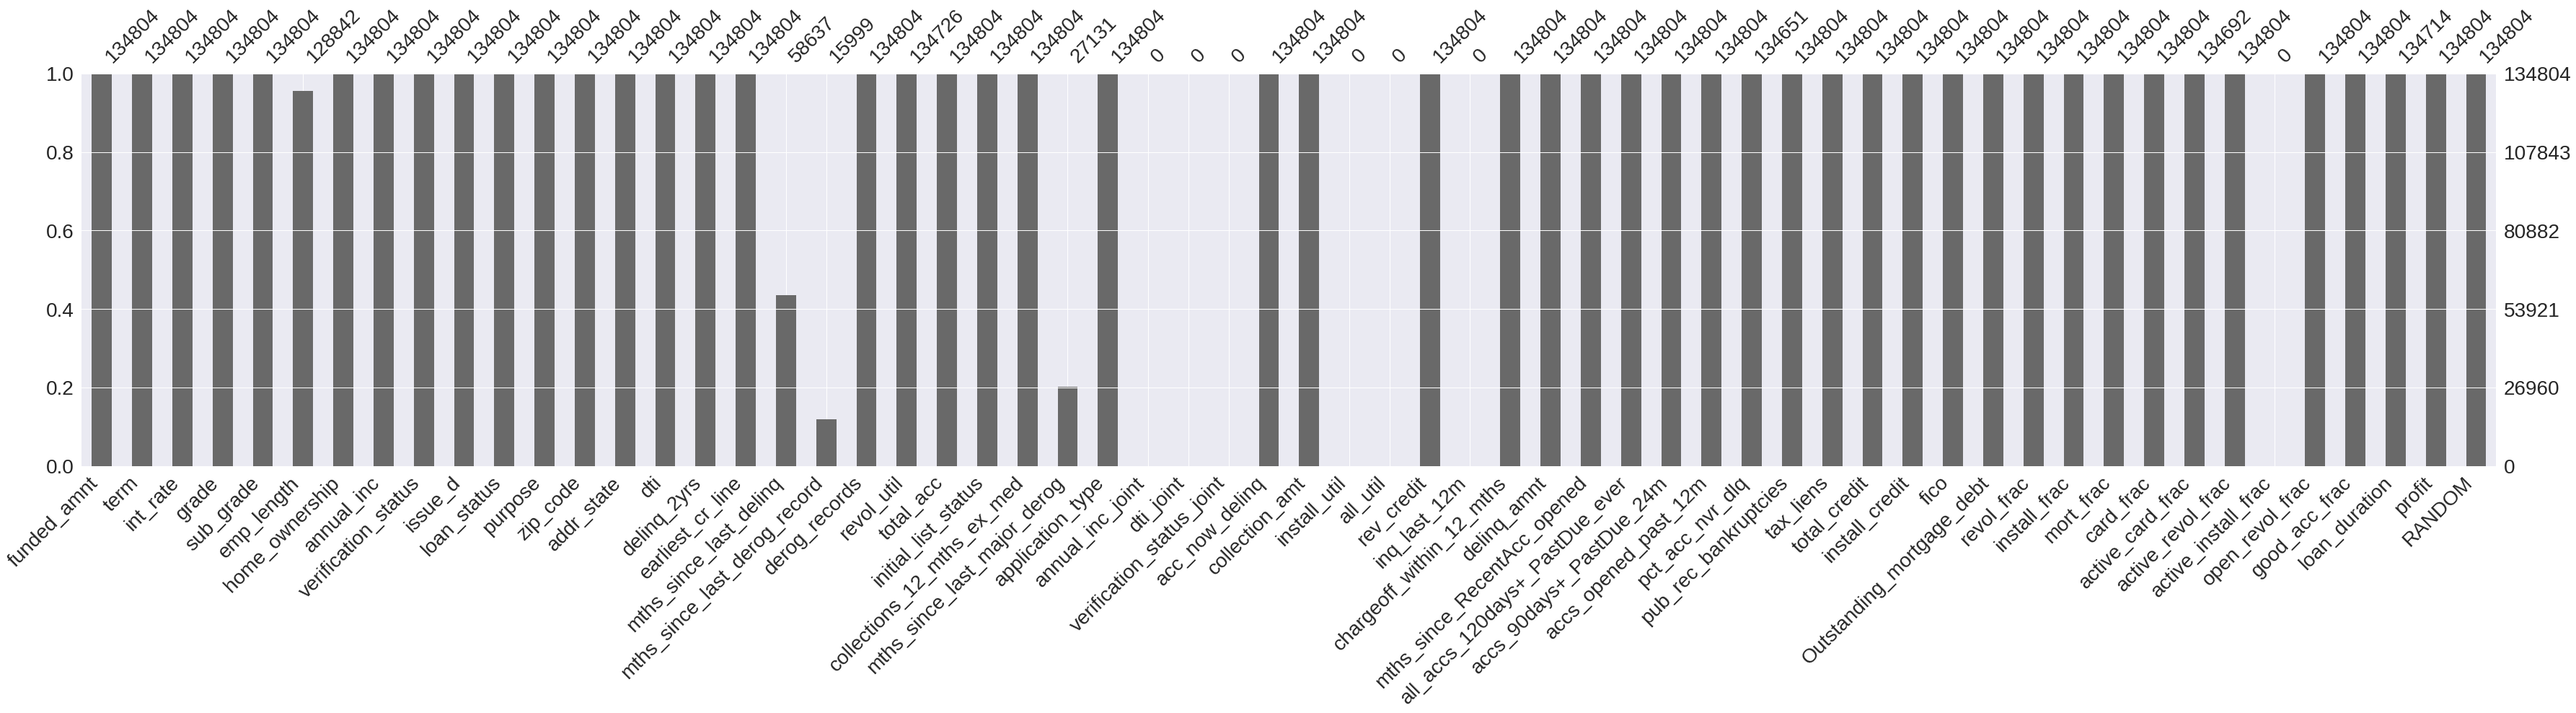

In [18]:
msno.bar(df_2013,figsize=(60, 10),fontsize=28,labels=True)

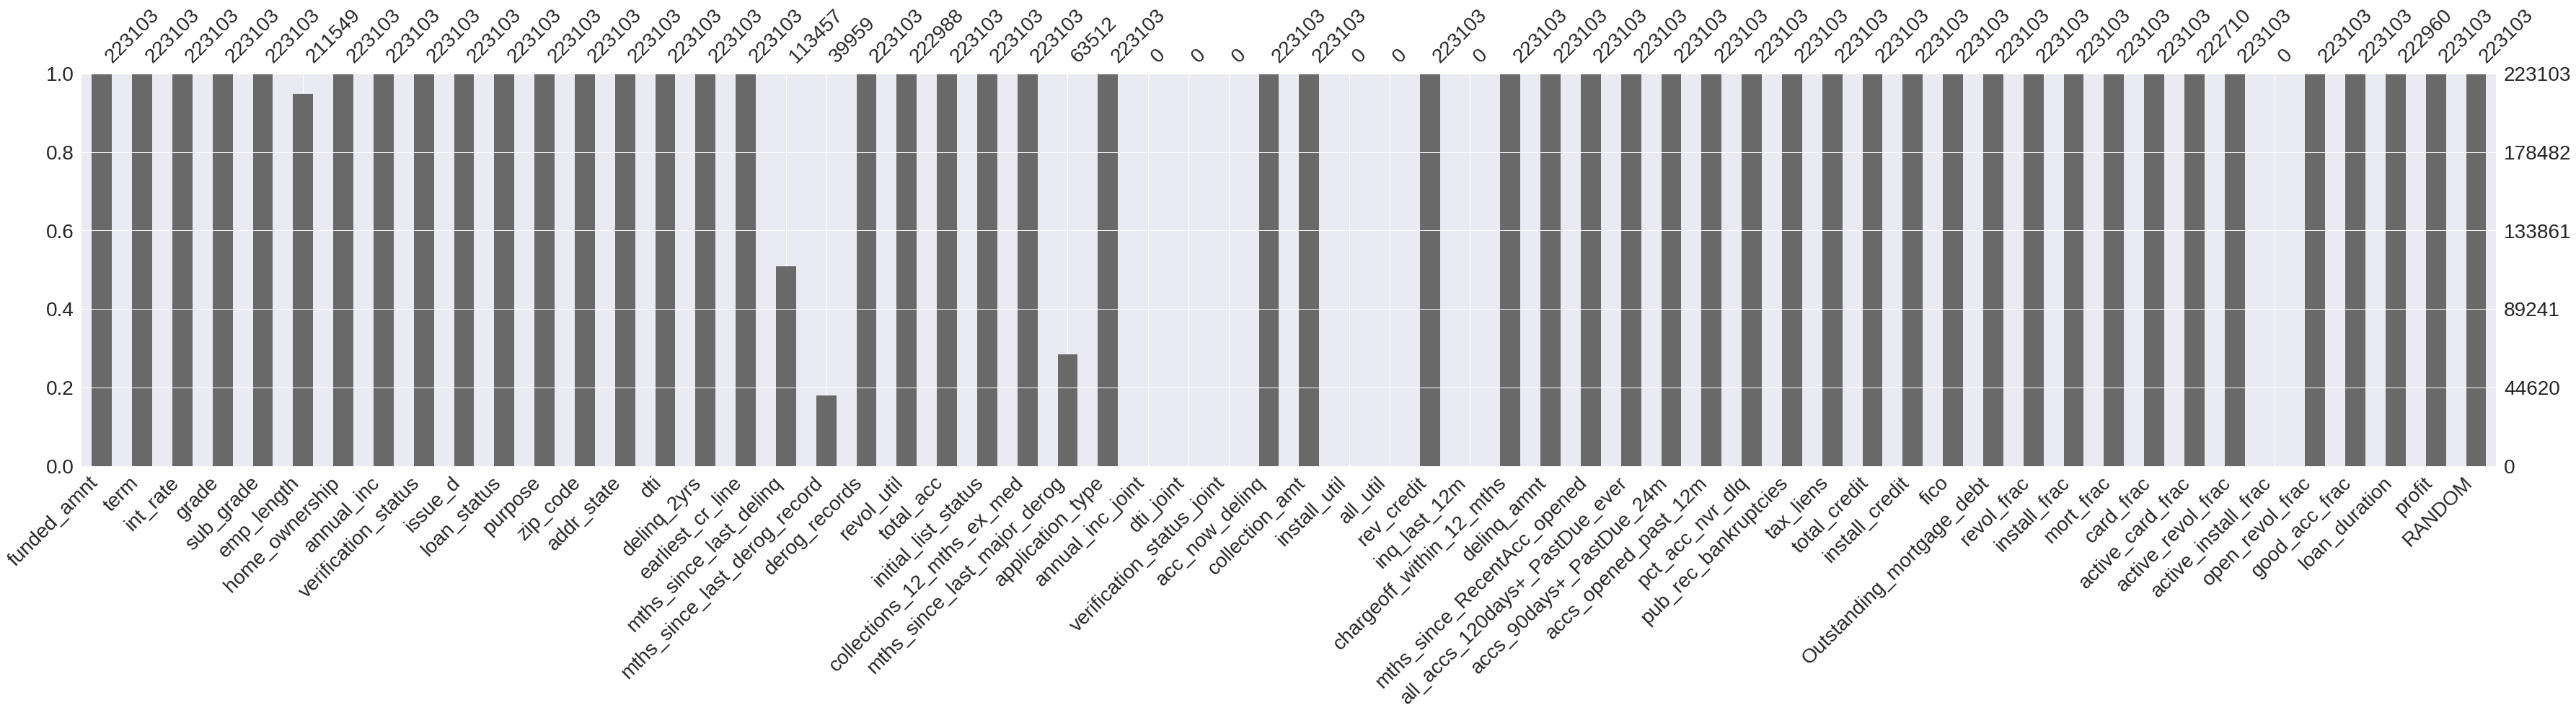

In [19]:
msno.bar(df_2014,figsize=(60, 10),fontsize=28,labels=True)

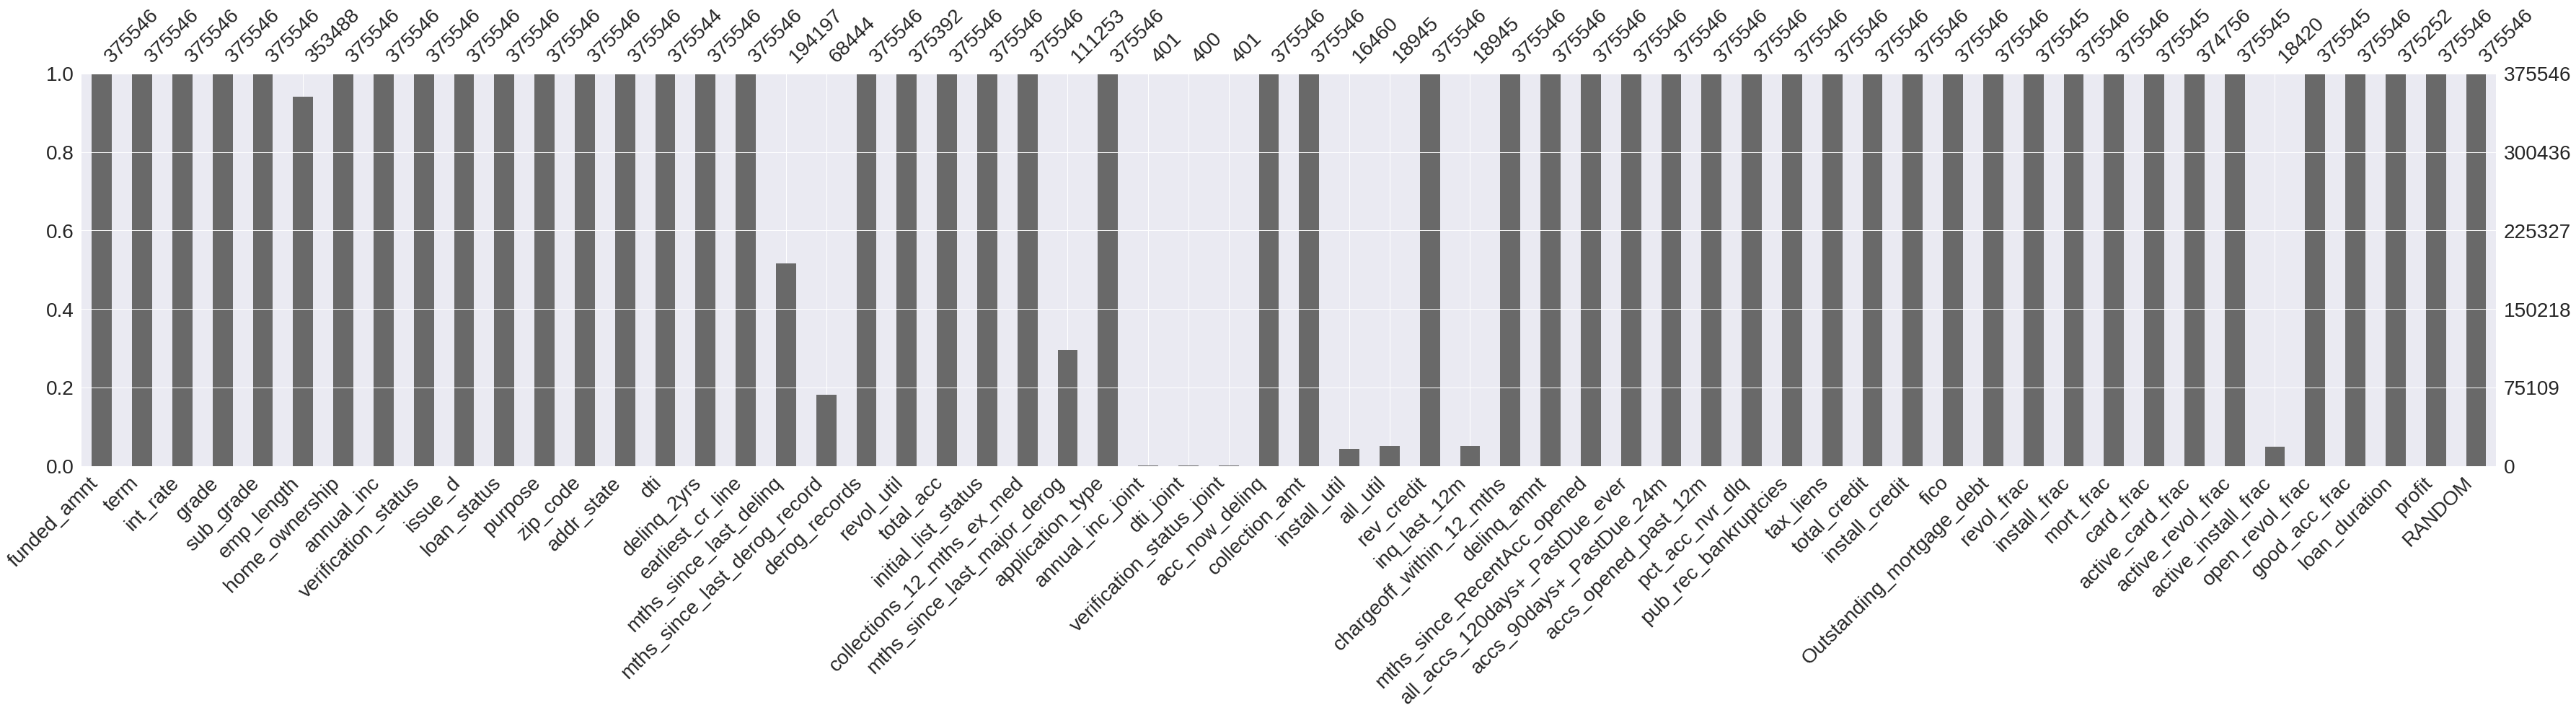

In [20]:
msno.bar(df_2015,figsize=(60, 10),fontsize=28,labels=True)

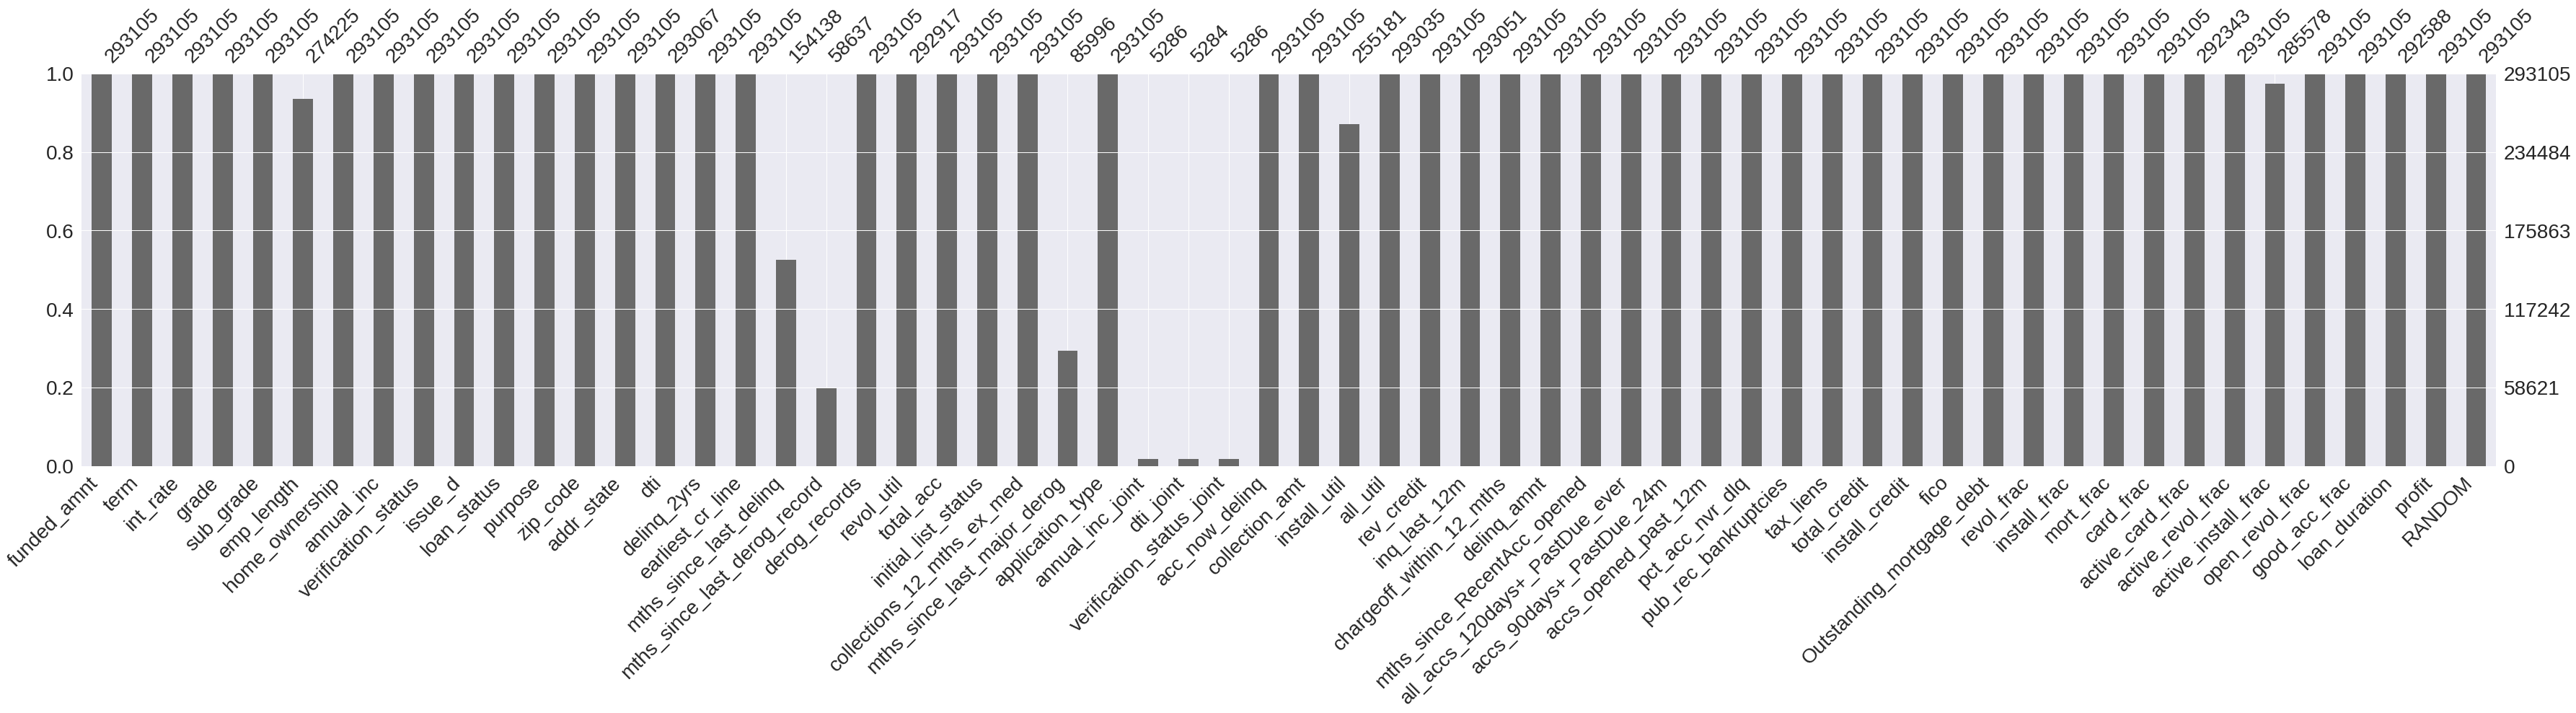

In [21]:
msno.bar(df_2016,figsize=(60, 10),fontsize=28,labels=True)

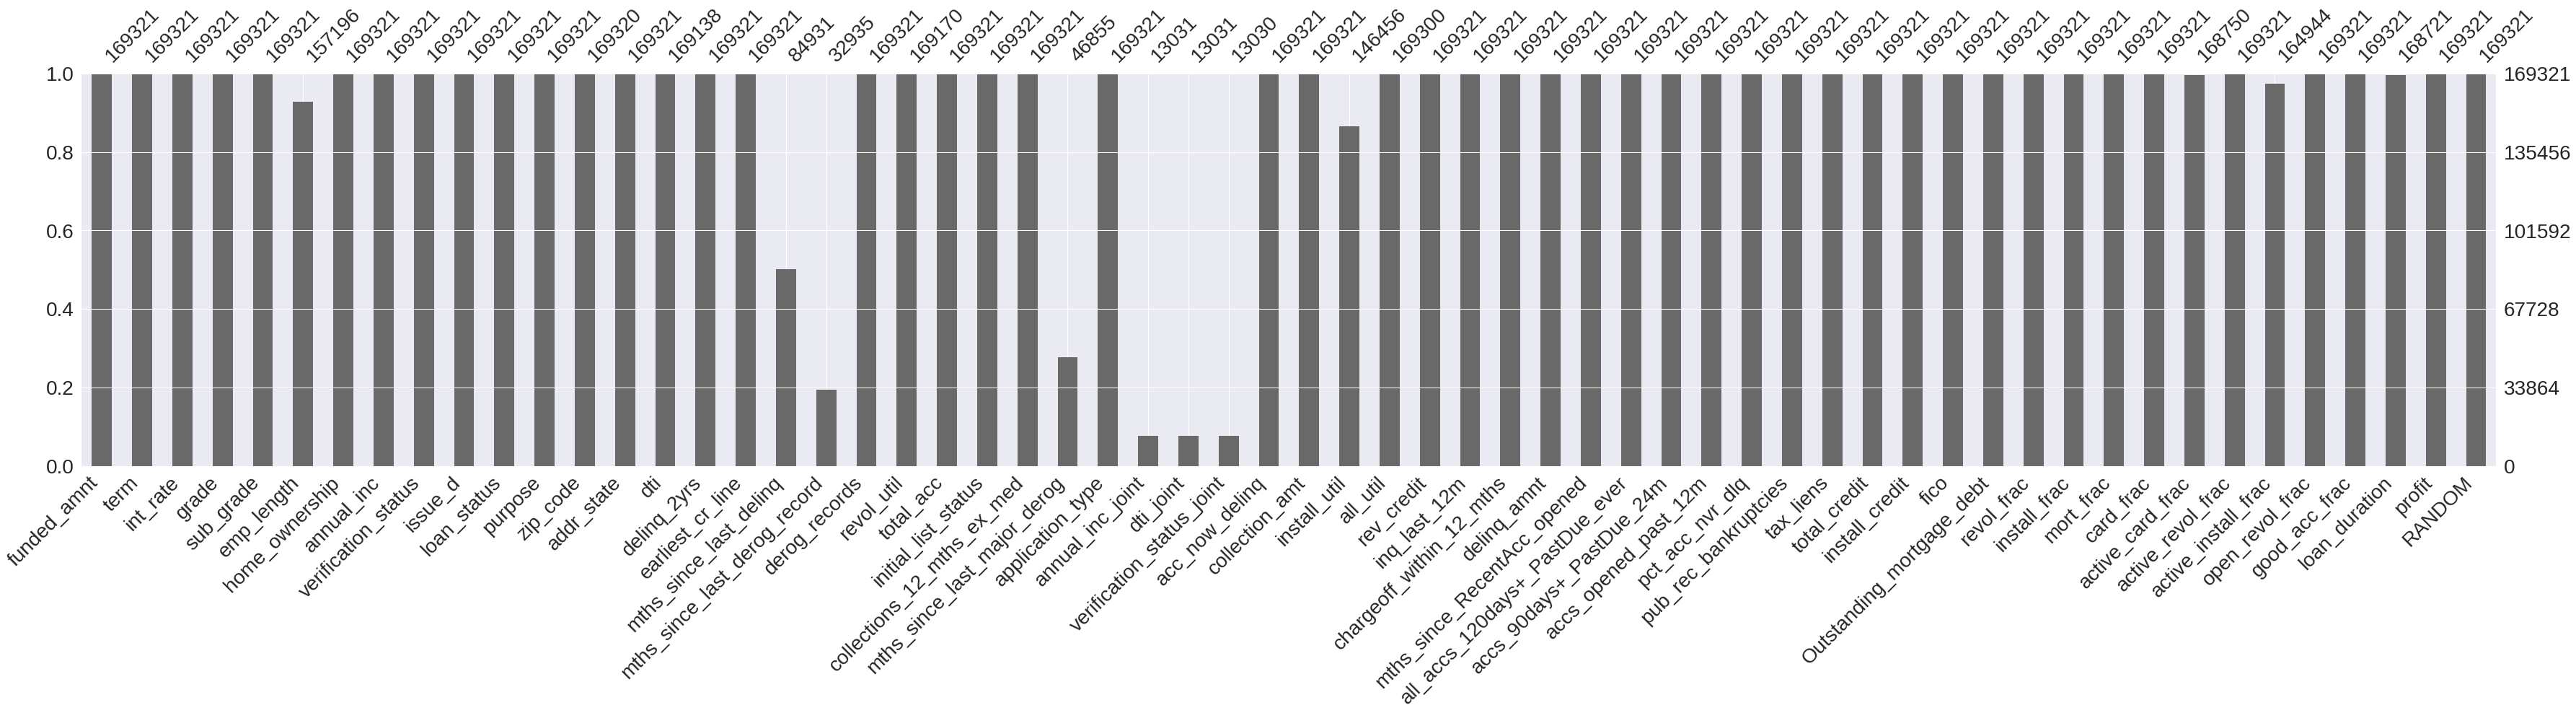

In [22]:
msno.bar(df_2017,figsize=(60, 10),fontsize=28,labels=True)

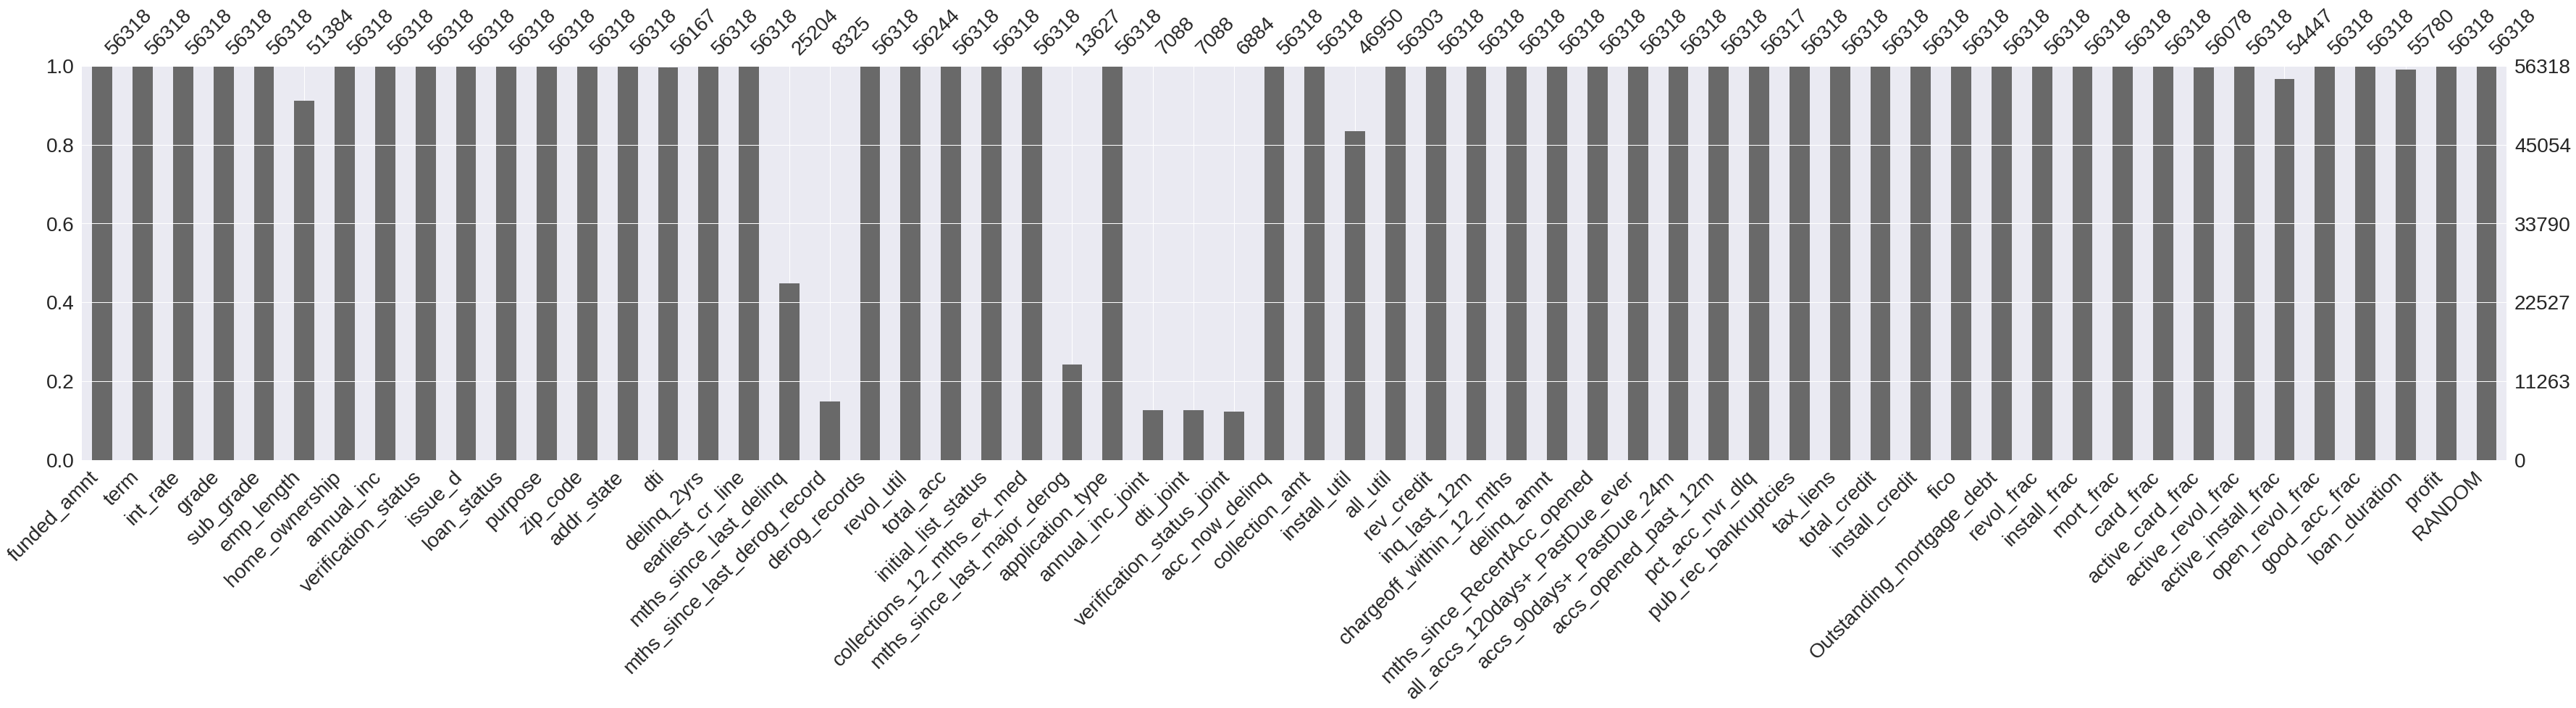

In [23]:
msno.bar(df_2018,figsize=(60, 10),fontsize=28,labels=True)

#### Drop any joint account info. They are features introduced very late and there are a lot of missingness.
#### Application type we will keep because it has info throughout the dataframe and can be important

In [24]:
df.drop(['verification_status_joint','dti_joint','annual_inc_joint'],axis=1,inplace=True)

In [25]:
df.head()

funded_amnt  term  int_rate grade sub_grade emp_length  \
id                                                                 
68407277       3600.0    36     13.99     C        C4  10+ years   
68355089      24700.0    36     11.99     C        C1  10+ years   
68341763      20000.0    60     10.78     B        B4  10+ years   
66310712      35000.0    60     14.85     C        C5  10+ years   
68476807      10400.0    60     22.45     F        F1    3 years   

         home_ownership  annual_inc verification_status    issue_d  \
id                                                                   
68407277       MORTGAGE     55000.0        Not Verified 2015-12-01   
68355089       MORTGAGE     65000.0        Not Verified 2015-12-01   
68341763       MORTGAGE     63000.0        Not Verified 2015-12-01   
66310712       MORTGAGE    110000.0     Source Verified 2015-12-01   
68476807       MORTGAGE    104433.0     Source Verified 2015-12-01   

         loan_status             purpose zip_code addr_state    dti  \
id                                                                    
68407277  Fully Paid  debt_consolidation    190xx         PA   5.91   
68355089  Fully Paid      small_business    577xx         SD  16.06   
68341763  Fully Paid    home_improvement    605xx         IL  10.78   
66310712     Current  debt_consolidation    076xx         NJ  17.06   
68476807  Fully Paid      major_purchase    174xx         PA  25.37   

          delinq_2yrs earliest_cr_line  mths_since_last_delinq  \
id                                                               
68407277          0.0       2003-08-01                    30.0   
68355089          1.0       1999-12-01                     6.0   
68341763          0.0       2000-08-01                     NaN   
66310712          0.0       2008-09-01                     NaN   
68476807          1.0       1998-06-01                    12.0   

          mths_since_last_derog_record  derog_records  revol_util  total_acc  \
id                                                                             
68407277                           NaN            0.0        29.7       13.0   
68355089                           NaN            0.0        19.2       38.0   
68341763                           NaN            0.0        56.2       18.0   
66310712                           NaN            0.0        11.6       17.0   
68476807                           NaN            0.0        64.5       35.0   

         initial_list_status  collections_12_mths_ex_med  \
id                                                         
68407277                   w                         0.0   
68355089                   w                         0.0   
68341763                   w                         0.0   
66310712                   w                         0.0   
68476807                   w                         0.0   

          mths_since_last_major_derog application_type  acc_now_delinq  \
id                                                                       
68407277                         30.0       Individual             0.0   
68355089                          NaN       Individual             0.0   
68341763                          NaN        Joint App             0.0   
66310712                          NaN       Individual             0.0   
68476807                          NaN       Individual             0.0   

          collection_amt  install_util  all_util  rev_credit  inq_last_12m  \
id                                                                           
68407277           722.0          36.0      34.0      9300.0           4.0   
68355089             0.0          73.0      29.0    111800.0           6.0   
68341763             0.0          73.0      65.0     14000.0           1.0   
66310712             0.0          70.0      45.0     67300.0           0.0   
68476807             0.0          84.0      78.0     34000.0           3.0   

          chargeoff_within_12_mth

# Cleaning up format of loan_duration

#### First remove dataframe with missing loan_duration

In [27]:
tempdf=df.dropna(subset=['loan_duration'])

In [33]:
pattern='([0-9]+)\sdays'
tempdf.loan_duration=tempdf.loan_duration.str.extract(pattern)
tempdf.loan_duration=tempdf.loan_duration.astype('int')
tempdf.loan_duration=tempdf.loan_duration/30

/home/auscheng/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
tempdf.head()

funded_amnt  term  int_rate grade sub_grade emp_length  \
id                                                                 
68407277       3600.0    36     13.99     C        C4  10+ years   
68355089      24700.0    36     11.99     C        C1  10+ years   
68341763      20000.0    60     10.78     B        B4  10+ years   
66310712      35000.0    60     14.85     C        C5  10+ years   
68476807      10400.0    60     22.45     F        F1    3 years   

         home_ownership  annual_inc verification_status    issue_d  \
id                                                                   
68407277       MORTGAGE     55000.0        Not Verified 2015-12-01   
68355089       MORTGAGE     65000.0        Not Verified 2015-12-01   
68341763       MORTGAGE     63000.0        Not Verified 2015-12-01   
66310712       MORTGAGE    110000.0     Source Verified 2015-12-01   
68476807       MORTGAGE    104433.0     Source Verified 2015-12-01   

         loan_status             purpose zip_code addr_state    dti  \
id                                                                    
68407277  Fully Paid  debt_consolidation    190xx         PA   5.91   
68355089  Fully Paid      small_business    577xx         SD  16.06   
68341763  Fully Paid    home_improvement    605xx         IL  10.78   
66310712     Current  debt_consolidation    076xx         NJ  17.06   
68476807  Fully Paid      major_purchase    174xx         PA  25.37   

          delinq_2yrs earliest_cr_line  mths_since_last_delinq  \
id                                                               
68407277          0.0       2003-08-01                    30.0   
68355089          1.0       1999-12-01                     6.0   
68341763          0.0       2000-08-01                     NaN   
66310712          0.0       2008-09-01                     NaN   
68476807          1.0       1998-06-01                    12.0   

          mths_since_last_derog_record  derog_records  revol_util  total_acc  \
id                                                                             
68407277                           NaN            0.0        29.7       13.0   
68355089                           NaN            0.0        19.2       38.0   
68341763                           NaN            0.0        56.2       18.0   
66310712                           NaN            0.0        11.6       17.0   
68476807                           NaN            0.0        64.5       35.0   

         initial_list_status  collections_12_mths_ex_med  \
id                                                         
68407277                   w                         0.0   
68355089                   w                         0.0   
68341763                   w                         0.0   
66310712                   w                         0.0   
68476807                   w                         0.0   

          mths_since_last_major_derog application_type  acc_now_delinq  \
id                                                                       
68407277                         30.0       Individual             0.0   
68355089                          NaN       Individual             0.0   
68341763                          NaN        Joint App             0.0   
66310712                          NaN       Individual             0.0   
68476807                          NaN       Individual             0.0   

          collection_amt  install_util  all_util  rev_credit  inq_last_12m  \
id                                                                           
68407277           722.0          36.0      34.0      9300.0           4.0   
68355089             0.0          73.0      29.0    111800.0           6.0   
68341763             0.0          73.0      65.0     14000.0           1.0   
66310712             0.0          70.0      45.0     67300.0           0.0   
68476807             0.0          84.0      78.0     34000.0           3.0   

          chargeoff_within_12_mth

In [36]:
tempdf.to_csv('lean_df_5.csv')

# Overall Summary of Missingness

In [ ]:
# pandas_profiling.ProfileReport(df_0)